# Question D3

*Question*: What is the size of the organization you currently work for?

*Answer Type*: Single Option

*Options*: [1-10 employees, 11-50 employees, 51-250 employees, 251-500 employees, 501-1,000 employees, 1,001-2,000 employees, More than 2,000 employees]

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

In [3]:
# For PROFES, we discarded suspended submissions (e.g., remove those who didn't complete the survey).
dataframe_obj.df.drop(dataframe_obj.df[dataframe_obj.df['Status'] == 'Suspended (22)'].index, inplace = True)

### Basic Analysis

In [4]:
dataframe_obj.df['D3_Company_Size'].head()

0        1,001-2,000 employees
1    More than 2,000 employees
2             51-250 employees
3    More than 2,000 employees
4          501-1,000 employees
Name: D3_Company_Size, dtype: object

In [5]:
# mapping of old labels to new one
d3_rename_mapping = {
    '1-10 employees': '1-10',
    '11-50 employees': '11-50',
    '51-250 employees': '51-250',
    '251-500 employees': '251-500',
    '501-1,000 employees': '501-1000',
    '1,001-2,000 employees': '1001-2000',
    'More than 2,000 employees': '+2000'
}

In [6]:
# update values in D3 column
dataframe_obj.df['D3_Company_Size'] = rename_values(rename_mapping=d3_rename_mapping,  
                                                    values=list(dataframe_obj.df['D3_Company_Size']))

In [7]:
# cleaning data
dataframe_obj.remove_value_from_df('0','D3_Company_Size')

In [8]:
positions_mapping = {
    '+2000': 6,
    '51-250': 2,
    '11-50': 1,
    '1001-2000': 5,
    '1-10': 0,
    '251-500': 3,
    '501-1000': 4
}

In [9]:
# barplot data
indexes = list(dataframe_obj.df['D3_Company_Size'].value_counts().index)
values = list(dataframe_obj.df['D3_Company_Size'].value_counts())
chart_positions = [positions_mapping[idx] for idx in indexes]

In [10]:
# plot object
d3_plot = PlotUtils(pd.DataFrame(
    data={'Company Size': indexes, 'Answers': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position'], ascending=True))

In [11]:
d3_plot.df

,Company Size,Answers,Chart Position
3,1-10,16,0
2,11-50,21,1
1,51-250,25,2
5,251-500,14,3
6,501-1000,6,4
4,1001-2000,15,5
0,+2000,80,6


C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-lcinjCty\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


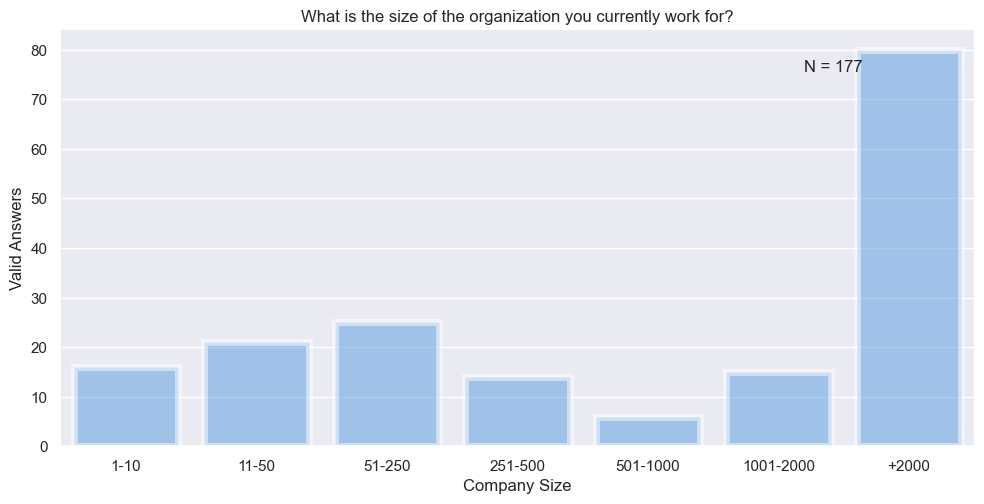

In [12]:
total_answers = 'N = ' + str(len(list(dataframe_obj.df['D3_Company_Size'])))
total_answers_int = len(list(dataframe_obj.df['D3_Company_Size']))

d3_plot.single_barplot(x_axis="Company Size", y_axis="Answers", 
                       title="What is the size of the organization you currently work for?",
                       x_label="Company Size", y_label="Valid Answers", x_label_rotation=0, color="#429bf5", 
                       total_answers=total_answers, bar_orientation='vertical')

### Bootstrapping Analysis

In [13]:
valid_options_list = list(dataframe_obj.df['D3_Company_Size'].unique())
valid_answers_list = list(dataframe_obj.df['D3_Company_Size'])

In [14]:
replacements = 1000
population_sample_size = total_answers_int # equals n - total valid answers

bootstrapping_obj = BootstrappingUtils(valid_answers_list, valid_options_list, replacements, population_sample_size, 95)

In [15]:
bootstrapped_dict_data = bootstrapping_obj.bootstrapping('single')

In [18]:
bootstrapped_dict_data[idx]['population']

[0.12,
 0.129,
 0.124,
 0.127,
 0.114,
 0.12,
 0.123,
 0.124,
 0.124,
 0.114,
 0.114,
 0.132,
 0.106,
 0.122,
 0.134,
 0.122,
 0.119,
 0.131,
 0.129,
 0.106,
 0.111,
 0.115,
 0.123,
 0.133,
 0.117,
 0.125,
 0.116,
 0.146,
 0.126,
 0.121,
 0.115,
 0.108,
 0.1,
 0.111,
 0.125,
 0.118,
 0.135,
 0.104,
 0.108,
 0.11,
 0.128,
 0.131,
 0.103,
 0.097,
 0.116,
 0.129,
 0.12,
 0.129,
 0.114,
 0.129,
 0.115,
 0.112,
 0.128,
 0.13,
 0.119,
 0.127,
 0.116,
 0.121,
 0.134,
 0.14,
 0.128,
 0.107,
 0.103,
 0.116,
 0.118,
 0.121,
 0.124,
 0.103,
 0.114,
 0.124,
 0.121,
 0.119,
 0.117,
 0.108,
 0.111,
 0.13,
 0.131,
 0.112,
 0.124,
 0.129,
 0.111,
 0.118,
 0.121,
 0.116,
 0.114,
 0.109,
 0.125,
 0.129,
 0.103,
 0.117,
 0.117,
 0.103,
 0.132,
 0.115,
 0.136,
 0.125,
 0.118,
 0.118,
 0.117,
 0.117,
 0.137,
 0.12,
 0.118,
 0.118,
 0.127,
 0.125,
 0.143,
 0.119,
 0.106,
 0.128,
 0.114,
 0.12,
 0.115,
 0.114,
 0.116,
 0.125,
 0.134,
 0.119,
 0.105,
 0.097,
 0.125,
 0.119,
 0.116,
 0.111,
 0.127,
 0.105,
 0.

In [16]:
# get a pair of values between dict key and all the list values inside that key 
# key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
indexes = []
values = []
chart_positions = []
for idx in bootstrapped_dict_data:
    indexes += [idx for _ in range(len(bootstrapped_dict_data[idx]['population']))]
    values += bootstrapped_dict_data[idx]['population']
    chart_positions += [positions_mapping[idx] for _ in range(len(bootstrapped_dict_data[idx]['population']))]

In [17]:
values = [100 * v for v in values]

In [18]:
# plot object for bootstrapped data
d3_boot_plot = PlotUtils(pd.DataFrame(
    data={'Company Size': indexes, 'Value': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position'], ascending=True))

C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-lcinjCty\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


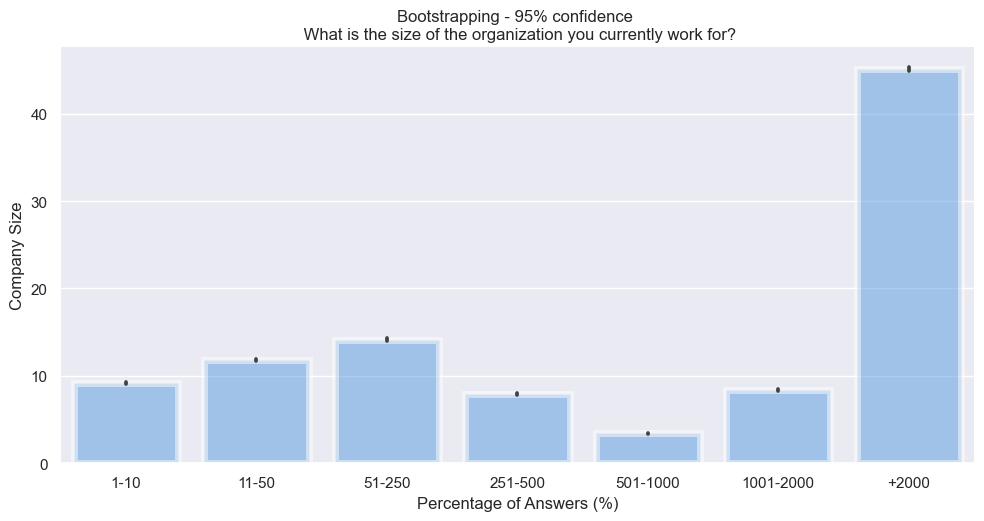

In [19]:
d3_boot_plot.single_barplot(x_axis="Company Size", y_axis="Value", 
                       title="Bootstrapping - 95% confidence \n What is the size of the organization you currently work for?",
                       x_label="Percentage of Answers (%)", y_label="Company Size", x_label_rotation=0, color="#429bf5", 
                       total_answers=total_answers, bar_orientation='vertical')

In [20]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':' + str(bootstrapped_dict_data[idx]['confidence']))

Option: (Lower Value, Mean, Upper Value)
1001-2000:(0.08277065359061835, 0.08398870056497174, 0.08520674753932513)
+2000:(0.44944545298547, 0.4516158192090396, 0.4537861854326092)
51-250:(0.13947911539512037, 0.14110734463276836, 0.14273557387041635)
501-1000:(0.03323162317214763, 0.03406214689265537, 0.034892670613163104)
1-10:(0.09014564820628491, 0.09148587570621468, 0.09282610320614444)
251-500:(0.0781939606203859, 0.07939548022598869, 0.08059699983159148)
11-50:(0.11706807852450273, 0.1183446327683616, 0.11962118701222048)


In [21]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':: P = ' + str(round((bootstrapped_dict_data[idx]['confidence'][1] * 100), 3)) + " [" + str(round((bootstrapped_dict_data[idx]['confidence'][0] * 100), 3)) + ", " + str(round((bootstrapped_dict_data[idx]['confidence'][2] * 100), 3)) + "]")

Option: (Lower Value, Mean, Upper Value)
1001-2000:: P = 8.399 [8.277, 8.521]
+2000:: P = 45.162 [44.945, 45.379]
51-250:: P = 14.111 [13.948, 14.274]
501-1000:: P = 3.406 [3.323, 3.489]
1-10:: P = 9.149 [9.015, 9.283]
251-500:: P = 7.94 [7.819, 8.06]
11-50:: P = 11.834 [11.707, 11.962]
